[Дашборд](https://public.tableau.com/app/profile/regina.abdulova/viz/Ecom_16816347946130/Dashboard1)  
[Презентация](https://disk.yandex.ru/i/SvkXiJZYJw9qEQ)  

___Проект:___
___Выявление профилей потребителей на основе данных интернет-магазина товаров для дома и быта «Пока все ещё тут»___  

___Задача:___  

___Сегментировать покупателей по профилю потребления___  

___- Провести исследовательский анализ данных___  
___- Сегментировать покупателей на основе истории их покупок___  
___- Сформулировать и проверить статистические гипотезы___ 

___Описание данных:___  

___Датасет описывает транзакции интернет-магазина___  

Колонки в  *ecom_dataset_upd.csv* :

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

## Шаг1 Предоработка данных:   

### Загрузить датасет. Исследовать общую информацию. Какие столбцы у нас представлены.Сколько строк хранит датасет. Есть ли пропуски,дупликаты?
###  Привести столбец с датой к формату datetime  
### Создать новый столбец с месяцем покупки ,столбец со стоимостью товара (цена * кол-во)
###  Привести значения столбца 'product' к нижнему регистру и создать новый столбец 'product_name',содержащий первые два слова названия товара 


In [1]:
import pandas as pd


import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st


from plotly import graph_objects as go

import warnings
warnings.filterwarnings("ignore")


In [2]:
google_id = "1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf"
data = pd.read_csv(f"https://drive.google.com/uc?export=download&id={google_id}" )

In [3]:
data.head(20)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


___В датафрейме 7474 строки , пропусков нет, представлены данные типа object,int64 и float64___

In [5]:
data.duplicated().sum()

0

___на данном этапе дупликатов нет___

In [6]:
data['date'] = pd.to_datetime(data['date'], format="%Y%m%d%H")
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [7]:
data['month']=pd.DatetimeIndex(data['date']).month
data.head()

,date,customer_id,order_id,product,quantity,price,month
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,10
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,10
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,10
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,10
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,10


In [8]:
data['date']=pd.DatetimeIndex(data['date']).date 
data.duplicated().sum()

966

___после приведения столбца с датой к типу date (без времени) появились дупликаты. Удалим их, т.к скорее всего это ошибочно скачаные данные (т.к не может быть заказ с уникальным номером в разное время , возможно с этими заказами что то делали в системе спустя какое-то время , поэтому они отобразились повторно)___

In [9]:
data=data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6508 non-null   object 
 1   customer_id  6508 non-null   object 
 2   order_id     6508 non-null   int64  
 3   product      6508 non-null   object 
 4   quantity     6508 non-null   int64  
 5   price        6508 non-null   float64
 6   month        6508 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 356.0+ KB


_так же попробуем найти еще дупликаты , возможно, в разые даты так же задвоились некоторые номера заказов_

In [11]:
#отсортируем датасет по номерам заказа и датам, оставим только минимальную дату каждого заказа
data=data.sort_values(by=['order_id','date']).groupby('order_id').apply(lambda x: x[x['date'] == x['date'].min()]).reset_index(drop=True)
data.head(30)
data=data.drop_duplicates().reset_index(drop=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5552 entries, 0 to 5551
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         5552 non-null   object 
 1   customer_id  5552 non-null   object 
 2   order_id     5552 non-null   int64  
 3   product      5552 non-null   object 
 4   quantity     5552 non-null   int64  
 5   price        5552 non-null   float64
 6   month        5552 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 303.8+ KB


___удалили найденные дупликаты___

_Создадим функцию, которая создаст столбец product name, содержащий первые два слова от названия продукта_

In [11]:
data['product']=data['product'].str.lower()

In [12]:
def product_name(row):
    product=row.split(' ')
    name=product[0]+' '+product[1]
    return name
data['product_name']=data['product'].apply(product_name) 
data.head(10)

,date,customer_id,order_id,product,quantity,price,month,product_name
0,2019-06-02,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"осина обыкновенная, высота 25-50 см",1,150.0,6,"осина обыкновенная,"
1,2019-06-02,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"осина обыкновенная, высота 50-100 см",1,225.0,6,"осина обыкновенная,"
2,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315.0,10,рассада зелени
3,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207.0,10,рассада зелени
4,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по ...,1,162.0,10,рассада зелени
5,2018-10-02,f08d9018-438e-4e96-b519-f74c0302a433,14480,многолетнее растение тимьян-чабрец розовый объ...,1,89.0,10,многолетнее растение
6,2018-10-02,f08d9018-438e-4e96-b519-f74c0302a433,14480,"рассада зелени для кухни базилик тонус, кассет...",1,169.0,10,рассада зелени
7,2018-10-02,f08d9018-438e-4e96-b519-f74c0302a433,14480,рассада зелени для кухни мелиссы в горшке диам...,1,101.0,10,рассада зелени
8,2018-10-02,49b9c587-c19e-4481-bace-967aeac357fa,14481,пеларгония зональная диам. 12 см малиновая с к...,1,150.0,10,пеларгония зональная
9,2018-10-02,49b9c587-c19e-4481-bace-967aeac357fa,14481,пеларгония зональная диам. 12 см сиренево-крас...,1,150.0,10,пеларгония зональная


_создадим новый столбец summary, содержащийй произведение стоимости товара на кол-во_

In [13]:
data['summary']=data['price']*data['quantity']
data.head(10)

,date,customer_id,order_id,product,quantity,price,month,product_name,summary
0,2019-06-02,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"осина обыкновенная, высота 25-50 см",1,150.0,6,"осина обыкновенная,",150.0
1,2019-06-02,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"осина обыкновенная, высота 50-100 см",1,225.0,6,"осина обыкновенная,",225.0
2,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315.0,10,рассада зелени,315.0
3,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207.0,10,рассада зелени,207.0
4,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по ...,1,162.0,10,рассада зелени,162.0
5,2018-10-02,f08d9018-438e-4e96-b519-f74c0302a433,14480,многолетнее растение тимьян-чабрец розовый объ...,1,89.0,10,многолетнее растение,89.0
6,2018-10-02,f08d9018-438e-4e96-b519-f74c0302a433,14480,"рассада зелени для кухни базилик тонус, кассет...",1,169.0,10,рассада зелени,169.0
7,2018-10-02,f08d9018-438e-4e96-b519-f74c0302a433,14480,рассада зелени для кухни мелиссы в горшке диам...,1,101.0,10,рассада зелени,101.0
8,2018-10-02,49b9c587-c19e-4481-bace-967aeac357fa,14481,пеларгония зональная диам. 12 см малиновая с к...,1,150.0,10,пеларгония зональная,150.0
9,2018-10-02,49b9c587-c19e-4481-bace-967aeac357fa,14481,пеларгония зональная диам. 12 см сиренево-крас...,1,150.0,10,пеларгония зональная,150.0


## Шаг2 Исследовательский анализ данных: 

###  Какая максимальная и минимальная дата представлены в датасете?  
###  Сколько всего пользователей представлены?  
###  Сколько уникальных названий товаров представлены?  


In [14]:
print(f"Минимальная дата в датасете:{data['date'].min()}")

Минимальная дата в датасете:2018-10-01


In [15]:
print(f"Максимальная дата в датасете:{data['date'].max()}")

Максимальная дата в датасете:2019-10-31


In [16]:
print(f"Всего представлено покупателей:{data['customer_id'].nunique()}")

Всего представлено покупателей:2426


In [17]:
print(f"Всего представлено уникальных товаров:{data['product'].nunique()}")

Всего представлено уникальных товаров:2336


###  Как покупки распределились по датам? есть ли периоды с бОльшим количествои продаж? 

In [18]:
orders_by_date=data.groupby('date',as_index=True)['order_id'].count()
orders_by_date=orders_by_date.reset_index(drop=False)
orders_by_date['date']=orders_by_date.date.astype('datetime64[M]')
orders_by_date1=orders_by_date.groupby('date')['order_id'].sum()
orders_by_date1=orders_by_date1.reset_index(drop=False)
orders_by_date1



,date,order_id
0,2018-10-01,482
1,2018-11-01,428
2,2018-12-01,312
3,2019-01-01,184
4,2019-02-01,356
5,2019-03-01,413
6,2019-04-01,675
7,2019-05-01,729
8,2019-06-01,290
9,2019-07-01,312


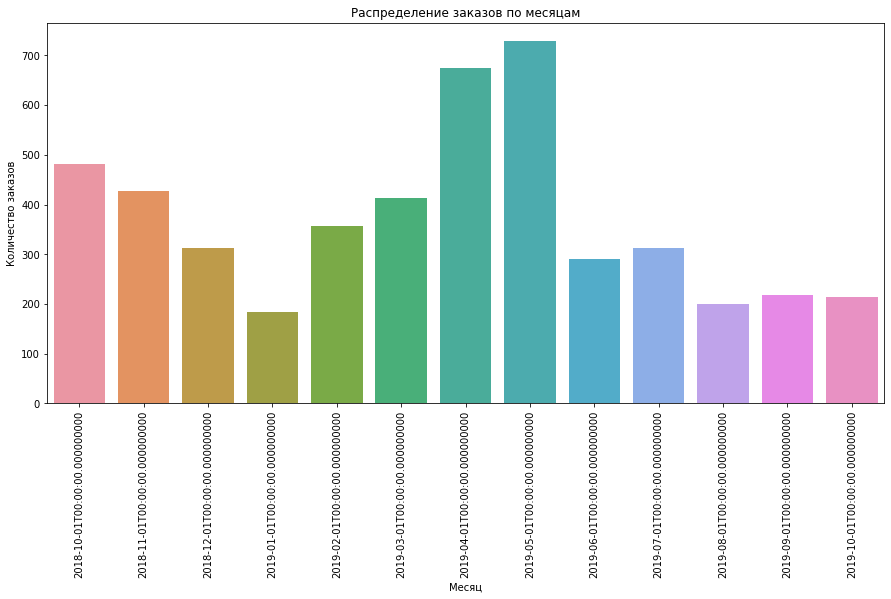

In [19]:
plt.figure(figsize=(15,7))
sns.barplot(x='date',y='order_id',data=orders_by_date1)
plt.xticks(rotation=90)
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.title('Распределение заказов по месяцам')
plt.show()


___Больше всего заказов было в апреле и мае 2019 года, меньше всего в январе,августе,сентябре и октябре 2019 года___

###  Как покупки распределились по пользователям? сколько в среднем приходится покупок на 1 пользователя? 

In [20]:
orders_by_clients=data.groupby('customer_id',as_index=False)['order_id'].nunique()
orders_by_clients.head(10)

,customer_id,order_id
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1
1,001cee7f-0b29-4716-b202-0042213ab038,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1
5,004d24e9-4a6c-4d0e-8727-8391dfd4b43a,1
6,005ba170-45e8-42de-93f7-192481ae2659,1
7,00bd74b1-2792-47db-a2f1-680a09ac5026,1
8,00c0f92a-121a-4883-a78d-2c7b5fe187de,1
9,00cd704a-a65c-4865-b39a-779f1b4f1d1a,1


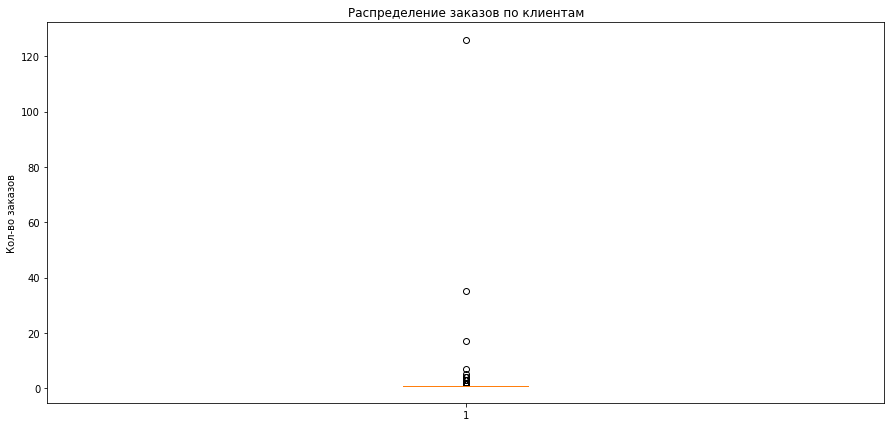

In [21]:
plt.figure(figsize=(15,7))
plt.boxplot(orders_by_clients['order_id'])
plt.title('Распределение заказов по клиентам')
plt.ylabel('Кол-во заказов')
plt.show()

In [22]:
orders_by_clients['order_id'].describe()

count    2426.000000
mean        1.150041
std         2.668749
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       126.000000
Name: order_id, dtype: float64

In [23]:
np.percentile(orders_by_clients['order_id'],[85,90,95,96,97,98,99])

array([1., 1., 2., 2., 2., 2., 3.])

In [24]:
orders_by_clients['order_id'].median()

1.0

___Большинство клиентов(не менее 90%) имеют 1 заказ. 5% клиентов имею не менее 2 заказов, и 1%-3 и более заказов. Наибольшее кол-во заказов у клиента -126. Посмотрим на клиентов , сделавших более 3 заказов___

In [25]:
orders_by_clients.query('order_id>3').sort_values(by='order_id',ascending=False)

,customer_id,order_id
1895,c971fb21-d54c-4134-938f-16b62ee86d3b,126
732,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
1088,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
1729,b7b865ab-0735-407f-8d0c-31f74d2806cc,7
16,0184f535-b60a-4914-a982-231e3f615206,5
689,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4
1800,bea7a833-2074-42db-bc49-4457abd3c930,4
2122,e0535076-6270-4df2-8621-cb06264a94fa,4


_посмотрим ,что заказывал клиент , сделавший 126 заказов_

In [26]:
orders_max=orders_by_clients.query('order_id==126')
orders_max=orders_max['customer_id'].to_list()
data_max_orders=data.query('customer_id in @orders_max')
pd.set_option('display.max_colwidth', None)
data_max_orders.sort_values(by='order_id')

,date,customer_id,order_id,product,quantity,price,month,product_name,summary
1950,2018-10-01,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379,1,674.0,10,чехол для,674.0
1956,2018-10-02,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,чехол для гладильной доски festival 137x60 см из хлопка 4738,1,1162.0,10,чехол для,1162.0
1988,2018-10-03,c971fb21-d54c-4134-938f-16b62ee86d3b,68511,набор прищепок большие пластиковые rozenbal пиноккио 10 шт r102312,10,86.0,10,набор прищепок,860.0
1989,2018-10-03,c971fb21-d54c-4134-938f-16b62ee86d3b,68514,сушилка для белья attribute прима 11 м синяя напольная adp410,1,749.0,10,сушилка для,749.0
2047,2018-10-08,c971fb21-d54c-4134-938f-16b62ee86d3b,68561,тележка багажная delta тбр-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас россия,1,742.0,10,тележка багажная,742.0
...,...,...,...,...,...,...,...,...,...
3490,2019-03-04,c971fb21-d54c-4134-938f-16b62ee86d3b,70582,нефролепис бостон d-12 см,1,292.0,3,нефролепис бостон,292.0
3493,2019-03-04,c971fb21-d54c-4134-938f-16b62ee86d3b,70589,калла крупноцветковая желтая,1,374.0,3,калла крупноцветковая,374.0
3502,2019-03-05,c971fb21-d54c-4134-938f-16b62ee86d3b,70606,пеларгония розебудная red pandora укорененный черенок,1,134.0,3,пеларгония розебудная,134.0
3506,2019-03-05,c971fb21-d54c-4134-938f-16b62ee86d3b,70614,гладильная доска ника lora fashion hlf 123х46 см,1,1949.0,3,гладильная доска,1949.0


_Возможно стоит порекомендовать магазину выделить этого клиента-например дать накопительную карту,что бы поощрить к еще большему кол-ву покупок_

###  Проверить данные на аномалии.Наибольшее количество покупок какого-либо товара   

In [27]:
products_cnt=data.groupby('product',as_index=True)['quantity'].sum().sort_values(ascending=False).head(20)
products_cnt=products_cnt.reset_index(drop=False)
products_cnt

,product,quantity
0,"вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000",1000
1,муляж яблоко 9 см красное,618
2,вешалки мягкие для деликатных вещей 3 шт шоколад,335
3,муляж яблоко зеленый 9 см полиуретан,228
4,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200
5,"крепеж для пружины дверной, 1107055",170
6,плечики пластмассовые размер 52 - 54 тула 1205158,160
7,"пружина дверная 240 мм оцинкованная (д-19 мм) без крепления, 1107014",150
8,муляж банан желтый 21 см полиуретан,109
9,"щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 5,5 см 1801096",105


In [28]:
data.query('product=="вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000"')


,date,customer_id,order_id,product,quantity,price,month,product_name,summary
4072,2019-06-18,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000",1000,675.0,6,вантуз с,675000.0


___Вантуз -1000 штук -наверняка ошибка , удалим эту строку как выброс___

In [29]:
data.query('order_id==71743')

,date,customer_id,order_id,product,quantity,price,month,product_name,summary
4072,2019-06-18,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000",1000,675.0,6,вантуз с,675000.0


In [30]:
data=data.query('order_id!=71743')

In [31]:
data.query('product=="муляж яблоко 9 см красное"')

,date,customer_id,order_id,product,quantity,price,month,product_name,summary
2343,2018-10-30,9804e44f-bf1d-4b3a-992f-e2a575b43b7d,68806,муляж яблоко 9 см красное,4,59.0,10,муляж яблоко,236.0
2353,2018-11-01,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0,11,муляж яблоко,8670.0
2372,2018-11-02,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,муляж яблоко 9 см красное,140,59.0,11,муляж яблоко,8260.0
2571,2018-11-17,2c2b3410-8218-4671-a208-4d20ed55056a,69028,муляж яблоко 9 см красное,1,59.0,11,муляж яблоко,59.0
3938,2019-05-20,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,муляж яблоко 9 см красное,300,51.0,5,муляж яблоко,15300.0
4765,2019-10-22,a0364684-750b-4162-9d19-9ad371a240df,73057,муляж яблоко 9 см красное,3,59.0,10,муляж яблоко,177.0


_Муляж яблоко заказывали разные клиенты. Возможно, для оформления интерьера или праздника. Решила его осавить_

In [32]:
products_cnt1=data.groupby('product',as_index=True)['quantity'].sum().sort_values(ascending=False).head(20)
products_cnt1=products_cnt1.reset_index(drop=False)
products_cnt1

,product,quantity
0,муляж яблоко 9 см красное,618
1,вешалки мягкие для деликатных вещей 3 шт шоколад,335
2,муляж яблоко зеленый 9 см полиуретан,228
3,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200
4,"крепеж для пружины дверной, 1107055",170
5,плечики пластмассовые размер 52 - 54 тула 1205158,160
6,"пружина дверная 240 мм оцинкованная (д-19 мм) без крепления, 1107014",150
7,муляж банан желтый 21 см полиуретан,109
8,"щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 5,5 см 1801096",105
9,"ёрш унитазный с деревянной ручкой , ваир 1712012",103


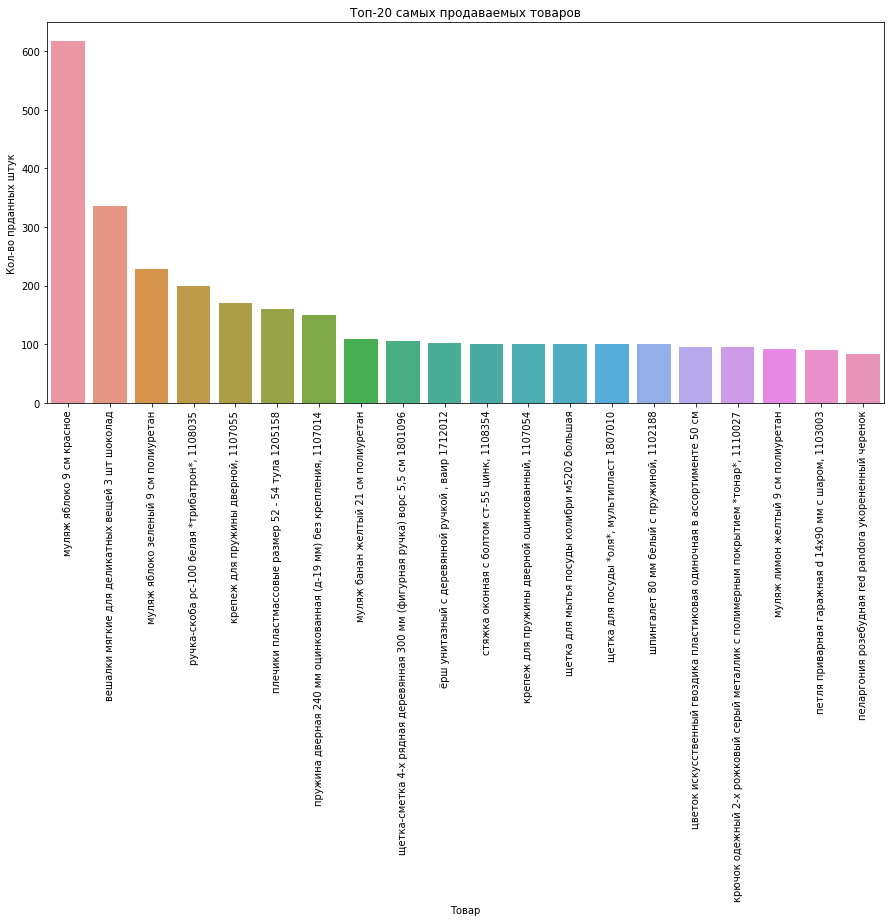

In [33]:
plt.figure(figsize=(15,7))
sns.barplot(data=products_cnt1,x='product',y='quantity')
plt.xticks(rotation=90)
plt.xlabel('Товар')
plt.ylabel('Кол-во прданных штук')
plt.title('Топ-20 самых продаваемых товаров')
plt.show()

###  Выделить список топ клиентов с наибольшим количеством покупок  

In [34]:
top_client=data.groupby('customer_id',as_index=True)['order_id'].nunique().sort_values(ascending=False).head(8)
top_client

customer_id
c971fb21-d54c-4134-938f-16b62ee86d3b    126
4d93d3f6-8b24-403b-a74b-f5173e40d7db     35
73d1cd35-5e5f-4629-8cf2-3fda829d4e58     17
b7b865ab-0735-407f-8d0c-31f74d2806cc      7
0184f535-b60a-4914-a982-231e3f615206      5
bea7a833-2074-42db-bc49-4457abd3c930      4
e0535076-6270-4df2-8621-cb06264a94fa      4
498f12a4-6a62-4725-8516-cf5dc9ab8a3a      4
Name: order_id, dtype: int64

###  Выделить список топ клиентов с самыми дорогими покупками  

In [35]:
expensive_top=data.pivot_table(index='customer_id',values='price').query('price>=5000').sort_values(by='price',ascending=False)
expensive_top=expensive_top.reset_index(drop=False)
expensive_top

,customer_id,price
0,0d87f4ae-465a-4fac-81e6-5d629761783e,14917.0
1,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,8737.0
2,ac250053-a236-467a-97d2-ddbb9bf4a1ba,8437.0
3,19d904d8-8d16-476d-8f66-b2a3b7a23660,8077.0
4,d5584388-ffbe-42fd-a746-a98828ec919f,7724.0
5,27d4ce42-352b-4756-bf5b-8724e05d5131,7679.0
6,e2fe6b48-1955-4882-925c-733f545df026,7679.0
7,fc333417-1d11-4a2a-b946-0957ae0603e9,7597.0
8,8d85f320-5f55-4647-814c-da1a6b21c2a4,7349.0
9,16838b36-762a-474d-bda4-bad95f8d7813,7229.0


_Воможно, клиентам,совершившим покупки от 5000 стоит дать скидочные карты , для еще большей мотивации к дорогим покупкам_

###  Есть ли клиенты ,которые более полугода ничего не покупали?  

In [36]:
last_6month=data.loc[data['date']<=dt.date(2019,4,30)]
last_6month['customer_id'].nunique()

1433

_Этим клиентам,возможно, стоит напомнить о себе_

## Шаг3 Выявление профилей потребителей (клиентов)  
###  Разделение товаров на категории с помощью функции categories  



_Выведем уникальные названия товаров из столбца product name и составим словарь с ключами-названиями категории и значениями_

In [37]:
data['product_name'].unique()

array(['осина обыкновенная,', 'рассада зелени', 'многолетнее растение',
       'пеларгония зональная', 'кориандр в', 'пеларгония розоцветная',
       'бегония ампельная,', 'рассада пеларгония', 'хризантема корейская',
       'бархатцы веселая', 'космея очаровашка', 'морковь детская',
       'настурция драгоценность', 'огурец засолочный', 'петуния каскад',
       'алиссум (лобулярия)', 'гвоздика турецкая', 'годеция рембранд',
       'календула пинк', 'капуста декоративная', 'кореопсис толл',
       'космея клюквенный', 'космея кэнди', 'лапчатка огненное',
       'львиный зев', 'флокс друммонда', 'цинерария серебряная',
       'эшшольция карминный', 'ель канадская', 'кипарисовик лавсона',
       'пеларгония розебудная', 'пеларгония toscana', 'рассада пряной',
       'примула комнатная', 'калибрахоа ампельная,', 'роза садовая',
       'пуансеттия в', 'рассада огурца', 'рассада томата',
       'цикламен комнатный', 'аквилегия обыкновенная', 'базилик смесь',
       'горох амброзия', 'землян

In [38]:
category_dict = {'интерьер' : ['фоторамка','коврик', 'ванн', 'муляж','штора', 'придверн', 'настенн', 'напольн','потолочн', 'текстильн', 'ковер','декоративн', 'складн','перекладина','карниз', 'раздвижн', 'штанга', 'встроенн', 'дсп','ящик', 'интерьерн','покрывало','этажерка', 'полк', 'плед', 'полка', 'светильник', 'подставка', 'обувь', 'комод','искусствен'],


'растения' : ['рассада','горшок','цветок','томат','помидор','пеларгония','однолетний', 'петуния','раннеспелый','капуста','садовый', 'растение','лиана','герань','черенок','огурец', 'кашпо', 'укоренять', 'мята','чайногибридный','фуксия','примула', 'калибрахоа','тимьян','цикламен','флокс','дыня','базилик','тыква','фиалка', 'крупноцветковый', 'вербена', 'арбуз', 'розмарин', 'бегония', 'пуансеттия','клубника', 'гвоздик','лаванда', 'кабачок','виноград', 'перец', 'петрушка', 'дерево','тюльпан', 'розебудный','бутон','хризантема', 'спирелла', 'новогвинейский','бальзамин','виола','лист','луковица', 'сальвия', 'прожилка', 'скороспелый', 'патиссон', 'лимон', 'хозлэнд', 'эвкалипт','азалия','андрианум','душица','кокос','ель', 'плантация', 'листовой', 'кольраби', 'мелисса', 'груша', 'вишня', 'гербера', 'ромашка', 'горох', 'трава','алиссум', 'оффициналис', 'декабрист', 'лобелия', 'позднеспелый', 'пчелоопыляем','гранат','мак', 'гортензия','клубнев', 'акаулис', 'дендробиум', 'зев', 'лепесток', 'цинния', 'плющелистн', 'чашелист', 'астра', 'зверобой', 'мандарин', 'персик', 'кориандр', 'шалфей','нарцисс', 'баклажан','крокус','лилия', 'настурция', 'календула', 'фаленопсис','спатифиллум', 'ландыш','подснежник', 'земляника','колокольчик', 'остеоспермум', 'вечноцветущий', 'поздний', 'сельдерей', 'корневой', 'тагетис','целозия', 'многолетний', 'чабрец', 'черешня', 'калатея', 'хлорофитум', 'глоксиния', 'цветущ', 'сантолина', 'афеляндра', 'скуаррос', 'орегано', 'чеснок','ананас', 'морковь', 'ветка', 'розебад', 'rosebud', 'ирис', 'аксинья', 'анис', 'мимоза', 'кореопсис', 'лапчатка', 'цинерария', 'диффенбахий', 'подсолнух', 'беатрис', 'кустовой', 'сциндапсус', 'плющ', 'эхинокактус', 'грузонь', 'ориганум', 'лилейник', 'гиацинт', 'аквилегия', 'незабудка','почвопокровн', 'эквадор', 'карлик','георгин', 'колосист', 'лайм','зенган', 'циния', 'гардения', 'июньский', 'колеус', 'цинерания', 'брокколи', 'осина', 'сакура', 'сосна', 'клен', 'салат', 'хризолидокарпус', 'лутесценс', 'циперус', 'зумул', 'лузеан', 'юкка', 'картофель', 'розебуд', 'облепиха', 'радермахера','суккулент', 'эхеверия', 'лавр', 'мирт', 'каланхое', 'литопс', 'укроп', 'космея', 'бархатцы','роза','аспарагус','d-'],

'товары для кухни': ['антинакипин','лоток','бальзам','толкушка','вкладыши','мантоварка','кисточка','картофелемялка','пресс','защитный','электроштопр','емкость','соль','стеклян','толкушка','концентрат','крышк', 'тарел', 'нож', 'салатн','чайник', 'кружк', 'салфет','обеденн', 'ложк','кухонн', 'сковорода', 'посуд', 'столовы','антипригарн', 'супов', 'чайны', 'стакан', 'столовая', 'медный','алюминий', 'вилка', 'термос', 'колба', 'разделочный', 'миксер', 'tepмокружка','терка','бокал', 'миска', 'хлебница', 'заварочный', 'тефлон', 'мерный', 'чугунный', 'масленка', 'овощеварка','бульонница','пароварка', 'блюдце','венчик', 'хохломской','сито', 'тортница', 'блюдо','соковыжималка', 'кипятильник', 'кондитерск','соковарка', 'дуршлаг', 'скатерть', 'махров', 'фужер', 'противень', 'кастрюл', 'термокружка', 'просеиватель','сахарница', 'половник', 'рыбочистка', 'термокружок', 'лопатка', 'салфетница', 'овощечистка','круж','кувшин','скалка','разделочн','форм','орехоколка'],

'товары для дома' : ['стеллаж','рукав','щетка','щётка','основание','стяжки','шпингалет','фен','котел','ковров','набор','стремянки','стеллажный','сиденье','подрукавник','швабр','подголовник','сметка','пробка','сменный','шило','ковш','сетка','мыльница','многофункци','кольца','сварка','кондиционер','комплект','вешалок','насадка','пылесос','сетка','штангенциркуль','бак','наматрацник','бидон','корзинка','ваза','прищепки','покрытие','веревка','мешок','сверло','фиксатор','обувница','скребок','пододеяльник','отжим','завертка','щетка','сушилка', 'складная', 'коробка','гладильн','хозяйствен','коврик', 'вешалка', 'таз', 'скатерть', 'корзина','щетка', 'крючок', 'универсальн', 'полотенце','противоскользящ','ерш','плечики','хозлэнд', 'влаговпитывающ', 'строительный','простыня', 'петля', 'кофр','магнит','прищепок', 'унитазный', 'батарея', 'шнур', 'совок','прибор', 'туалет', 'мусорный', 'бытовой', 'вантуз','окномойка', 'дозатор','стяжка', 'автополив','измерительный', 'угольник', 'термометр', 'ролик', 'почтовый', 'тряпка', 'трудновыводим', 'крем', 'грязеулавливающ', 'наматрасник', 'чехол', 'садовый', 'полотенце', 'мыло', 'простыня','наволочка', 'одеяло', 'перчатк', 'стремянка', 'лестница-стремянка', 'биопорошок', 'контейнер', 'швабра', 'урна', 'крепеж', 'пружина', 'пена', 'сверло-фреза', 'ткань', 'подушка', 'зубной', 'веник', 'ведро', 'белье','нитрид','зубная', 'банка', 'утюг', 'корыто', 'унитаз', 'пакет', 'решетка', 'угол', 'паста', 'линейка', 'бензин', 'ванна', 'пьезозажигалка', 'медь', 'губка', 'бумага', 'антижир', 'ручка','подкладк','средство','вешалк','ёрш','весы'],


'сумки' : ['сумка', 'тележка']}

In [39]:
def categories(goods): 
    for category, items in category_dict.items():
        for item in items:
            if item in goods:
                return category
    return 'Другие'

In [40]:
data['category']=data['product_name'].apply(categories)

In [41]:
data.head(5)

,date,customer_id,order_id,product,quantity,price,month,product_name,summary,category
0,2019-06-02,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"осина обыкновенная, высота 25-50 см",1,150.0,6,"осина обыкновенная,",150.0,растения
1,2019-06-02,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"осина обыкновенная, высота 50-100 см",1,225.0,6,"осина обыкновенная,",225.0,растения
2,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315.0,10,рассада зелени,315.0,растения
3,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207.0,10,рассада зелени,207.0,растения
4,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162.0,10,рассада зелени,162.0,растения


In [42]:
pd.set_option('display.max_rows', None)
data.query('category=="Другие"')


,date,customer_id,order_id,product,quantity,price,month,product_name,summary,category
109,2018-12-03,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,"годеция рембранд 0,1 г 4650091480128",2,11.0,12,годеция рембранд,22.0,Другие
124,2018-12-03,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,"эшшольция карминный король 0,5 г 4660010770193",2,10.0,12,эшшольция карминный,20.0,Другие
126,2018-12-12,c5a58955-4352-4d1c-bb4e-16ca0a94bc6f,14516,кипарисовик лавсона элвуди ртк 106 горшок 9 л нидерланды,1,202.0,12,кипарисовик лавсона,202.0,Другие
374,2019-03-25,470bf3f8-7b9c-4cd9-bd59-24dbc13495e5,14590,овсянница сизая серый объем 1 л,1,89.0,3,овсянница сизая,89.0,Другие
385,2019-03-28,56f19ebf-c69b-4482-8cda-cc184f16e7f0,14595,"смолевка звездный взрыв 0,02 г 4650091480630",1,19.0,3,смолевка звездный,19.0,Другие
407,2019-03-28,e58284ef-20d2-42dd-879d-fdd6bd653f3f,14597,вербейник монетчатый желты,1,89.0,3,вербейник монетчатый,89.0,Другие
412,2019-03-28,e58284ef-20d2-42dd-879d-fdd6bd653f3f,14597,котовник блю мун синий объем 1 л,1,97.0,3,котовник блю,97.0,Другие
414,2019-03-28,e58284ef-20d2-42dd-879d-fdd6bd653f3f,14597,овсянница сизая серый объем 1 л,1,89.0,3,овсянница сизая,89.0,Другие
419,2019-03-28,e58284ef-20d2-42dd-879d-fdd6bd653f3f,14597,"эхинацея микс объем 0,5 л",1,97.0,3,эхинацея микс,97.0,Другие
420,2019-03-28,e58284ef-20d2-42dd-879d-fdd6bd653f3f,14597,"ясколка войлочная белая объем 0,5 л",1,97.0,3,ясколка войлочная,97.0,Другие


In [43]:
data.query('category=="Другие"')['product_name'].unique()

array(['годеция рембранд', 'эшшольция карминный', 'кипарисовик лавсона',
       'овсянница сизая', 'смолевка звездный', 'вербейник монетчатый',
       'котовник блю', 'эхинацея микс', 'ясколка войлочная',
       'папоротник страусник', 'энотера миссурийская',
       'пиретрум робинсон', 'вероника колосковая', 'маттиола ночная',
       'лук порей', 'хоста микс', 'гайлардия крупноцветковая',
       'монарда гибридная', 'рудбекия тайгер', 'седум (очиток)',
       'барвинок синий', 'молодило в', 'бузульник пржевальского',
       'камнеломка арендса', 'солидаго желтый', 'физостегия вергинская',
       'камнеломка тенистая', 'лен небесная', 'лаватера монт',
       'анемона белый', 'буддлея вейера', 'валериана лекарственная',
       'змееголовник молдавский', 'любисток удалец', 'монарда в',
       'кофе арабика', 'лантана в', 'адиантум лиза', 'нолина в',
       'иссоп лекарственный', 'молодило микс', 'альбука спиралис',
       'крассула овата', 'артемизия (полынь', 'калоцефалус брауни',
     

_В категории Другие остались только названия растений , переместим из в категорию растения_

In [44]:
data=data.replace('Другие','растения')
categories_data=data.groupby('category',as_index=True)['quantity'].sum().sort_values(ascending=False).reset_index(drop=False)
categories_data

,category,quantity
0,товары для дома,4373
1,растения,3833
2,интерьер,2850
3,товары для кухни,1251
4,сумки,278


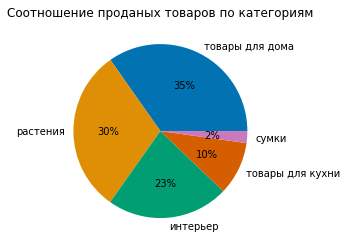

In [45]:
df = categories_data['quantity']
labels = categories_data['category']

colors = sns.color_palette('colorblind')[ 0:5 ]
#create pie chart
plt.pie(df, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Соотношение проданых товаров по категориям')
plt.show()

___Больше всего продано товаров категории "товары для дома" и "растения",меньше всего товаров категории "сумки"___

###  Сегментирование пользователей с помощью RFM-анализа  

_Создадим новый столбец, одержащий общую стоимость для каждого заказа и общее кол-во товаров для каждого заказа_

In [46]:
data_1=data.pivot_table(index='order_id',values='summary',aggfunc='sum').reset_index(drop=False)
data_1.head(20)


,order_id,summary
0,12624,375.0
1,13547,684.0
2,14480,359.0
3,14481,600.0
4,14482,376.0
5,14485,676.0
6,14486,1880.0
7,14487,514.0
8,14490,750.0
9,14494,752.0


In [47]:
data_2=data.groupby('order_id')['quantity'].sum().reset_index(drop=False)
data_2.head(10)

,order_id,quantity
0,12624,2
1,13547,3
2,14480,3
3,14481,4
4,14482,2
5,14485,4
6,14486,10
7,14487,4
8,14490,5
9,14494,4


In [48]:
data=data.merge(data_1,on='order_id',how='left')
data.info()        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4814 entries, 0 to 4813
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          4814 non-null   object 
 1   customer_id   4814 non-null   object 
 2   order_id      4814 non-null   int64  
 3   product       4814 non-null   object 
 4   quantity      4814 non-null   int64  
 5   price         4814 non-null   float64
 6   month         4814 non-null   int64  
 7   product_name  4814 non-null   object 
 8   summary_x     4814 non-null   float64
 9   category      4814 non-null   object 
 10  summary_y     4814 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 451.3+ KB


In [49]:
data=data.merge(data_2,on='order_id',how='left')
data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4814 entries, 0 to 4813
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          4814 non-null   object 
 1   customer_id   4814 non-null   object 
 2   order_id      4814 non-null   int64  
 3   product       4814 non-null   object 
 4   quantity_x    4814 non-null   int64  
 5   price         4814 non-null   float64
 6   month         4814 non-null   int64  
 7   product_name  4814 non-null   object 
 8   summary_x     4814 non-null   float64
 9   category      4814 non-null   object 
 10  summary_y     4814 non-null   float64
 11  quantity_y    4814 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 488.9+ KB


In [50]:
data['order_id']=data['order_id'].astype(int)

In [51]:
data.head(20)

,date,customer_id,order_id,product,quantity_x,price,month,product_name,summary_x,category,summary_y,quantity_y
0,2019-06-02,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"осина обыкновенная, высота 25-50 см",1,150.0,6,"осина обыкновенная,",150.0,растения,375.0,2
1,2019-06-02,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,12624,"осина обыкновенная, высота 50-100 см",1,225.0,6,"осина обыкновенная,",225.0,растения,375.0,2
2,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315.0,10,рассада зелени,315.0,растения,684.0,3
3,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207.0,10,рассада зелени,207.0,растения,684.0,3
4,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162.0,10,рассада зелени,162.0,растения,684.0,3
5,2018-10-02,f08d9018-438e-4e96-b519-f74c0302a433,14480,"многолетнее растение тимьян-чабрец розовый объем 0,5 л",1,89.0,10,многолетнее растение,89.0,растения,359.0,3
6,2018-10-02,f08d9018-438e-4e96-b519-f74c0302a433,14480,"рассада зелени для кухни базилик тонус, кассета по 6шт",1,169.0,10,рассада зелени,169.0,растения,359.0,3
7,2018-10-02,f08d9018-438e-4e96-b519-f74c0302a433,14480,рассада зелени для кухни мелиссы в горшке диам. 9 см,1,101.0,10,рассада зелени,101.0,растения,359.0,3
8,2018-10-02,49b9c587-c19e-4481-bace-967aeac357fa,14481,пеларгония зональная диам. 12 см малиновая с красным полумахровая,1,150.0,10,пеларгония зональная,150.0,растения,600.0,4
9,2018-10-02,49b9c587-c19e-4481-bace-967aeac357fa,14481,пеларгония зональная диам. 12 см сиренево-красная простая,1,150.0,10,пеларгония зональная,150.0,растения,600.0,4


_Создадим RFM_table, содержащую для каждого клиента количество дней с даты последней покупки-R, Количество заказов-F, и суммарную выручку -M_

In [52]:
NOW = dt.datetime(2019,10,31)

data['date'] = pd.to_datetime(data['date'])

RFM_table=data.groupby('customer_id').agg({'date': lambda x: (NOW - x.max()).days, # давность 
                                                'order_id': lambda x: len(x.unique()), # частота
                                                'summary_y': lambda x: x.sum()})    # выручка 

RFM_table['date'] = RFM_table['date'].astype(int)

RFM_table.rename(columns={'date': 'recency', 
                         'order_id': 'frequency',
                         'summary_y': 'monetary_value'}, inplace=True)
RFM_table.head()

,recency,frequency,monetary_value
customer_id,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,15,1,2220.0
001cee7f-0b29-4716-b202-0042213ab038,257,1,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,17,1,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,277,1,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,32,1,2324.0


In [53]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,110.0,1.0,307.0
0.50,212.0,1.0,749.0
0.75,295.0,1.0,1949.0


In [54]:
# Converting quantiles to a dictionary, easier to use.
quantiles = quantiles.to_dict()
##  RFM Segmentation ----
RFM_Segment = RFM_table.copy()
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
RFM_Segment['R_Quartile'] = RFM_Segment['recency'].apply(R_Class, args=('recency',quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['frequency'].apply(FM_Class, args=('frequency',quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['monetary_value'].apply(FM_Class, args=('monetary_value',quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)

In [55]:
#лучшие клиенты
group_1=RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('monetary_value', ascending=False)
group_1=group_1.reset_index(drop=False)
group_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     18 non-null     object 
 1   recency         18 non-null     int64  
 2   frequency       18 non-null     int64  
 3   monetary_value  18 non-null     float64
 4   R_Quartile      18 non-null     int64  
 5   F_Quartile      18 non-null     int64  
 6   M_Quartile      18 non-null     int64  
 7   RFMClass        18 non-null     object 
dtypes: float64(1), int64(5), object(2)
memory usage: 1.2+ KB


___Выявили 1 кластер пользователей самых лучших -group_1, в нем 18 покупателей___

In [56]:
group_1_list=group_1['customer_id'].to_list()

In [57]:
group_1=data.query('customer_id in @group_1_list')
group_1.head()

,date,customer_id,order_id,product,quantity_x,price,month,product_name,summary_x,category,summary_y,quantity_y
1132,2019-05-13,6a86cc77-ef15-496f-b5d3-89005597ee5d,14763,"лобелия ампельная, диам. 12 см",1,142.0,5,"лобелия ампельная,",142.0,растения,1786.0,16
1133,2019-05-13,6a86cc77-ef15-496f-b5d3-89005597ee5d,14763,"однолетнее растение лобелия в кассете по 4 шт, россия",4,82.0,5,однолетнее растение,328.0,растения,1786.0,16
1134,2019-05-13,6a86cc77-ef15-496f-b5d3-89005597ee5d,14763,"однолетнее растение петуния махровая в кассете 4 шт, россия",2,82.0,5,однолетнее растение,164.0,растения,1786.0,16
1135,2019-05-13,6a86cc77-ef15-496f-b5d3-89005597ee5d,14763,петуния ампельная белая в горшке p9,3,128.0,5,петуния ампельная,384.0,растения,1786.0,16
1136,2019-05-13,6a86cc77-ef15-496f-b5d3-89005597ee5d,14763,петуния ампельная красная в горшке p9,3,128.0,5,петуния ампельная,384.0,растения,1786.0,16


_посмотрим, какие категории товаров заказывают лучшие  покупатели_

In [58]:
group_1_category=group_1.groupby('category')['quantity_x'].sum().reset_index(drop=False).sort_values(by='quantity_x',ascending=False).reset_index(drop=True)
group_1_category

,category,quantity_x
0,растения,66
1,товары для дома,21
2,интерьер,9
3,сумки,7
4,товары для кухни,3


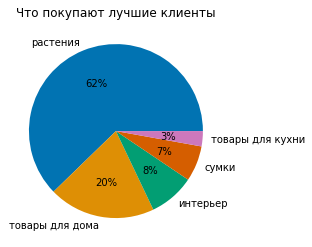

In [59]:
df1 = group_1_category['quantity_x']
labels1 = group_1_category['category']

colors = sns.color_palette('colorblind')[ 0:5 ]
#create pie chart
plt.pie(df1, labels = labels1, colors = colors, autopct='%.0f%%')
plt.title('Что покупают лучшие клиенты')
plt.show()

___Больше всего лучшие клиенты заказывают растения-62% и товары для дома -20%.Меньше всего-товары для кухни (3%).Сумки и товары для интерьера-тоже немного(7% и 8%)___

In [60]:
group_1['date']=group_1.date.astype('datetime64[M]')
group1_month=group_1.pivot_table(index='date',values='quantity_x',columns='category',aggfunc='sum').reset_index(drop=False)
group1_month=group1_month.fillna(0)
group1_month

category,date,интерьер,растения,сумки,товары для дома,товары для кухни
0,2019-04-01,0.0,0.0,0.0,1.0,0.0
1,2019-05-01,0.0,19.0,0.0,0.0,0.0
2,2019-06-01,0.0,8.0,0.0,0.0,0.0
3,2019-07-01,2.0,1.0,0.0,1.0,0.0
4,2019-08-01,3.0,13.0,5.0,4.0,0.0
5,2019-09-01,3.0,22.0,0.0,1.0,0.0
6,2019-10-01,1.0,3.0,2.0,14.0,3.0


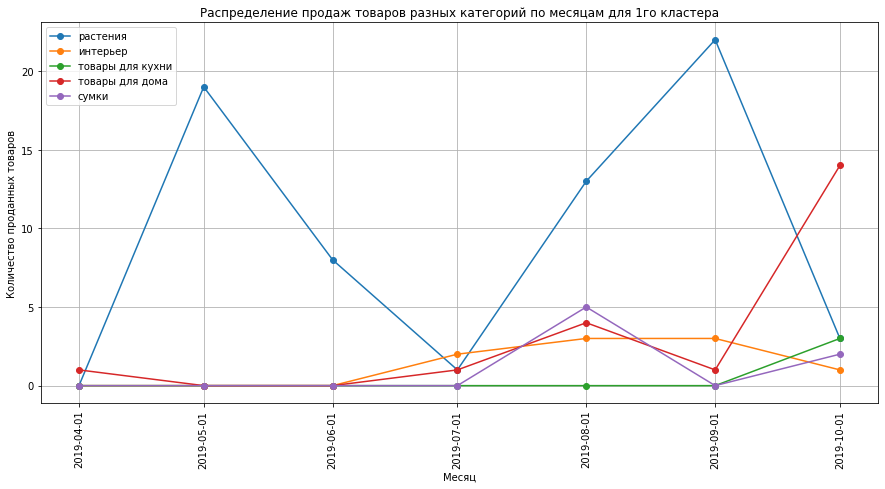

In [61]:
fig, ax = plt.subplots(figsize=(15, 7))

for i in list(data.category.unique()):
    ax.plot(group1_month.date, group1_month.loc[:, i], marker ='o', label=i)

plt.xticks(group1_month.date)
plt.xticks(rotation=90)
plt.xlabel('Месяц')
plt.ylabel('Количество проданных товаров')
plt.grid()
plt.legend(loc='upper left')
plt.title('Распределение продаж товаров разных категорий по месяцам для 1го кластера')
plt.show()

___Растения лучше всего продавались в мае и сентябре 2019 года,товары для дома-в августе и октябре,сумки-в августе,товары для интерьера -в июле,августе и сентябре,товары для кухни-в октябре___

In [62]:
print(f"Медианное значение чека первого кластера:{group_1['summary_y'].median()}")

Медианное значение чека первого кластера:1060.0


_выведем табличку,содержащую id клиента и категории товаров,которые он ранее покупал_

In [63]:
best_customers=group_1.groupby('customer_id')['category'].unique().reset_index(drop=False)
best_customers.head()

,customer_id,category
0,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,[растения]
1,126dac4d-6486-49ed-a1be-9fd55a38a9de,[товары для дома]
2,399da134-5db6-4861-89fc-6595e7583e98,[сумки]
3,518c441d-9295-4ca0-b652-4662fa383bb2,"[товары для дома, интерьер]"
4,540072bd-cc85-43b5-a6d6-0a8720499e65,[товары для дома]


In [64]:
#лояльные клиенты
group_2=RFM_Segment.query('F_Quartile >= 3 and R_Quartile>=2').sort_values('monetary_value', ascending=False)
group_2=group_2.reset_index(drop=False)
group_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     138 non-null    object 
 1   recency         138 non-null    int64  
 2   frequency       138 non-null    int64  
 3   monetary_value  138 non-null    float64
 4   R_Quartile      138 non-null    int64  
 5   F_Quartile      138 non-null    int64  
 6   M_Quartile      138 non-null    int64  
 7   RFMClass        138 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 8.8+ KB


___Второй кластер-лояльные пользователи. Те, у которых количество заказов достаточно большое и давность покупки-средняя и ниже. В этом кластере 138 клиентов___

In [65]:
group_2_list=group_2['customer_id'].to_list()
group_2=data.query('customer_id in @group_2_list')
group_2


,date,customer_id,order_id,product,quantity_x,price,month,product_name,summary_x,category,summary_y,quantity_y
130,2019-01-12,eb6521ae-56e3-4a72-9ea2-e9c69701ff3f,14522,пеларгония зональная диам. 12 см белая махровая,1,150.0,1,пеларгония зональная,150.0,растения,1418.0,10
131,2019-01-12,eb6521ae-56e3-4a72-9ea2-e9c69701ff3f,14522,пеларгония зональная диам. 12 см коралловая полумахровая,1,188.0,1,пеларгония зональная,188.0,растения,1418.0,10
132,2019-01-12,eb6521ae-56e3-4a72-9ea2-e9c69701ff3f,14522,пеларгония зональная диам. 12 см красный махровый,1,150.0,1,пеларгония зональная,150.0,растения,1418.0,10
133,2019-01-12,eb6521ae-56e3-4a72-9ea2-e9c69701ff3f,14522,пеларгония зональная диам. 12 см лососевая махровая,1,150.0,1,пеларгония зональная,150.0,растения,1418.0,10
134,2019-01-12,eb6521ae-56e3-4a72-9ea2-e9c69701ff3f,14522,пеларгония зональная диам. 12 см розово-красная полумахровая,1,150.0,1,пеларгония зональная,150.0,растения,1418.0,10
135,2019-01-12,eb6521ae-56e3-4a72-9ea2-e9c69701ff3f,14522,пеларгония зональная диам. 12 см сиреневый полумахровый,1,150.0,1,пеларгония зональная,150.0,растения,1418.0,10
136,2019-01-12,eb6521ae-56e3-4a72-9ea2-e9c69701ff3f,14522,пеларгония зональная диам. 12 см темнорозовая полумахровая,1,150.0,1,пеларгония зональная,150.0,растения,1418.0,10
137,2019-01-12,eb6521ae-56e3-4a72-9ea2-e9c69701ff3f,14522,пеларгония зональная простая цвет фуксии,1,150.0,1,пеларгония зональная,150.0,растения,1418.0,10
138,2019-01-12,eb6521ae-56e3-4a72-9ea2-e9c69701ff3f,14522,пеларгония зональная розоцветная маргарита лососевая 5-7 листов,1,90.0,1,пеларгония зональная,90.0,растения,1418.0,10
139,2019-01-12,eb6521ae-56e3-4a72-9ea2-e9c69701ff3f,14522,пеларгония розоцветная ред розебуд молодые растения,1,90.0,1,пеларгония розоцветная,90.0,растения,1418.0,10


In [66]:
group_2_category=group_2.groupby('category')['quantity_x'].sum().reset_index(drop=False).sort_values(by='quantity_x',ascending=False).reset_index(drop=True)
group_2_category

,category,quantity_x
0,растения,791
1,товары для дома,396
2,интерьер,269
3,товары для кухни,265
4,сумки,30


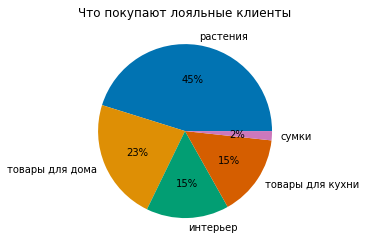

In [67]:
df2 = group_2_category['quantity_x']
labels2 = group_2_category['category']

colors = sns.color_palette('colorblind')[ 0:5 ]
#create pie chart
plt.pie(df2, labels = labels2, colors = colors, autopct='%.0f%%')
plt.title('Что покупают лояльные клиенты')
plt.show()

___Кластер лояльных клиентов так же больше всего покупает растения(45%), а так же товары для дома(23%),товары для кухни(15%) и для интерьера(15%). Меньше всего покупают сумок(2%)___

In [68]:
group_2['date']=group_2.date.astype('datetime64[M]')
group2_month=group_2.pivot_table(index='date',values='quantity_x',columns='category',aggfunc='sum').reset_index(drop=False)
group2_month=group2_month.fillna(0)
group2_month

category,date,интерьер,растения,сумки,товары для дома,товары для кухни
0,2018-10-01,21.0,7.0,3.0,90.0,33.0
1,2018-11-01,2.0,15.0,2.0,27.0,19.0
2,2018-12-01,12.0,11.0,3.0,29.0,36.0
3,2019-01-01,38.0,41.0,0.0,13.0,33.0
4,2019-02-01,73.0,50.0,4.0,32.0,27.0
5,2019-03-01,16.0,30.0,1.0,12.0,29.0
6,2019-04-01,28.0,316.0,4.0,88.0,62.0
7,2019-05-01,0.0,193.0,0.0,39.0,0.0
8,2019-06-01,9.0,43.0,1.0,6.0,18.0
9,2019-07-01,57.0,18.0,2.0,11.0,0.0


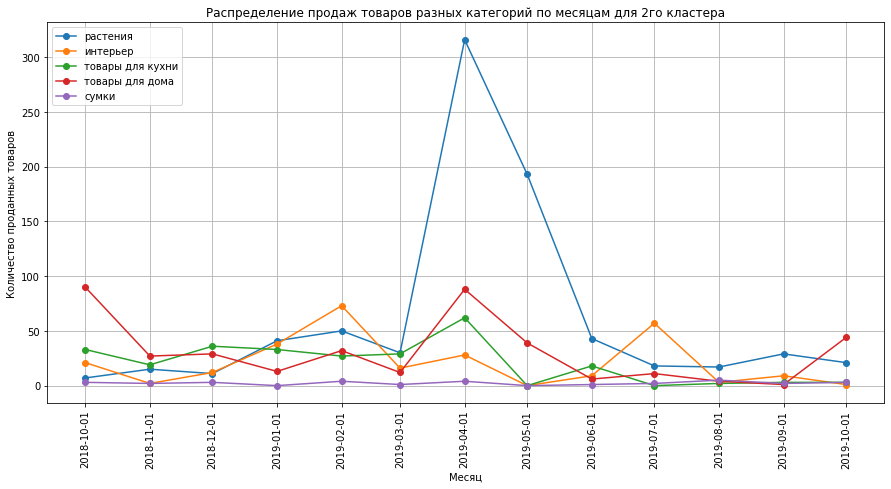

In [69]:
fig, ax = plt.subplots(figsize=(15, 7))

for i in list(data.category.unique()):
    ax.plot(group2_month.date, group2_month.loc[:, i], marker ='o', label=i)

plt.xticks(group2_month.date)
plt.xticks(rotation=90)
plt.xlabel('Месяц')
plt.ylabel('Количество проданных товаров')
plt.grid()
plt.legend(loc='upper left')
plt.title('Распределение продаж товаров разных категорий по месяцам для 2го кластера')
plt.show()

___Растения лучше всего продавались в апреле и мае 2019 года,товары для дома-в октябре 2018, апреле 2019 и октябре 2019года,товары для интерьера-в феврале 2018 года и июле 2019 года,товары для кухни -в апреле 2019 года___

In [70]:
print(f"Медианное значение чека второго кластера:{group_2['summary_y'].median()}")

Медианное значение чека второго кластера:864.0


_создадим табличку,отображающую id пользователя и категории товаров,которые он ранее заказывал_

In [71]:
loyal_customers=group_2.groupby('customer_id')['category'].unique().reset_index(drop=False)
loyal_customers.head()

,customer_id,category
0,0184f535-b60a-4914-a982-231e3f615206,[растения]
1,02adb72a-3067-45e9-a3b5-f93d79d7496a,[товары для дома]
2,07abcccf-1887-4b4e-b6bf-8054759bc419,[интерьер]
3,08199320-6a87-4a2c-8565-dfc0c8484184,[растения]
4,0a4e4711-5cb7-4bae-93cf-6731902708de,"[товары для дома, растения]"


In [72]:
#на пороге оттока
group_3=RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('monetary_value', ascending=False)
group_3=group_3.reset_index(drop=False)
group_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1207 non-null   object 
 1   recency         1207 non-null   int64  
 2   frequency       1207 non-null   int64  
 3   monetary_value  1207 non-null   float64
 4   R_Quartile      1207 non-null   int64  
 5   F_Quartile      1207 non-null   int64  
 6   M_Quartile      1207 non-null   int64  
 7   RFMClass        1207 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 75.6+ KB


___Третий кластер-пользователи , на пороге оттока -они совершали покупку очень давно. Их -1207 пользователей___

In [73]:
group_3_list=group_3['customer_id'].to_list()
group_3=data.query('customer_id in @group_3_list')
group_3.head()

,date,customer_id,order_id,product,quantity_x,price,month,product_name,summary_x,category,summary_y,quantity_y
2,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315.0,10,рассада зелени,315.0,растения,684.0,3
3,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207.0,10,рассада зелени,207.0,растения,684.0,3
4,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162.0,10,рассада зелени,162.0,растения,684.0,3
5,2018-10-02,f08d9018-438e-4e96-b519-f74c0302a433,14480,"многолетнее растение тимьян-чабрец розовый объем 0,5 л",1,89.0,10,многолетнее растение,89.0,растения,359.0,3
6,2018-10-02,f08d9018-438e-4e96-b519-f74c0302a433,14480,"рассада зелени для кухни базилик тонус, кассета по 6шт",1,169.0,10,рассада зелени,169.0,растения,359.0,3


In [74]:
group_3_category=group_3.groupby('category')['quantity_x'].sum().reset_index(drop=False).sort_values(by='quantity_x',ascending=False).reset_index(drop=True)
group_3_category

,category,quantity_x
0,товары для дома,2636
1,интерьер,1568
2,растения,1180
3,товары для кухни,859
4,сумки,162


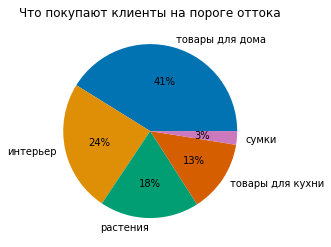

In [75]:
df3 = group_3_category['quantity_x']
labels3 = group_3_category['category']

colors = sns.color_palette('colorblind')[ 0:5 ]
#create pie chart
plt.pie(df3, labels = labels3, colors = colors, autopct='%.0f%%')
plt.title('Что покупают клиенты на пороге оттока')
plt.show()

___Кластер клиентов на пороге оттока больше всего покупают товары для дома(41%) и интерьера(24%). Растения(18%) и товары для кухни(13%) -чуть меньше. Сумки-меньше всего(3%)___

In [76]:
group_3['date']=group_3.date.astype('datetime64[M]')
group3_month=group_3.pivot_table(index='date',values='quantity_x',columns='category',aggfunc='sum').reset_index(drop=False)
group3_month=group3_month.fillna(0)
group3_month

category,date,интерьер,растения,сумки,товары для дома,товары для кухни
0,2018-10-01,265,153,19,1023,97
1,2018-11-01,517,132,17,327,249
2,2018-12-01,141,110,83,502,172
3,2019-01-01,95,156,6,237,108
4,2019-02-01,314,205,17,238,153
5,2019-03-01,232,406,17,294,77
6,2019-04-01,4,18,3,15,3


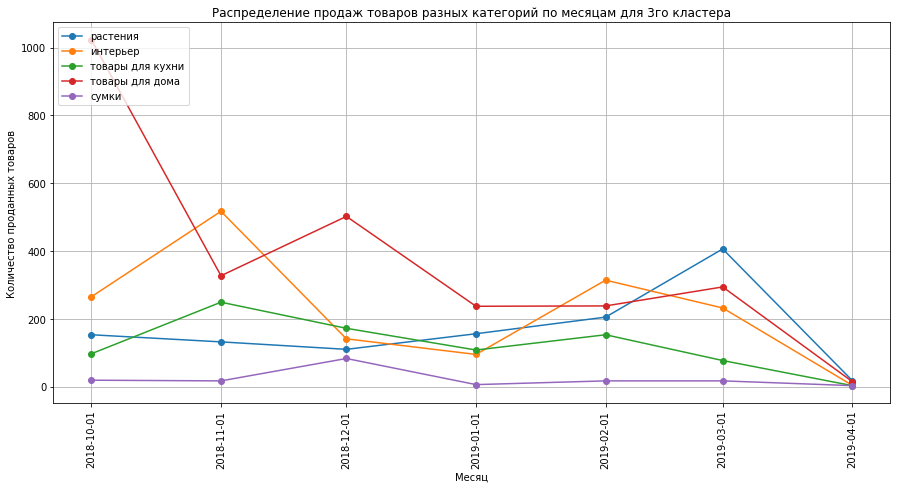

In [77]:
fig, ax = plt.subplots(figsize=(15, 7))

for i in list(data.category.unique()):
    ax.plot(group3_month.date, group3_month.loc[:, i], marker ='o', label=i)

plt.xticks(group3_month.date)
plt.xticks(rotation=90)
plt.xlabel('Месяц')
plt.ylabel('Количество проданных товаров')
plt.grid()
plt.legend(loc='upper left')
plt.title('Распределение продаж товаров разных категорий по месяцам для 3го кластера')
plt.show()

___Растения лучше всего покупались в марте 2019 года, товары для дома -в октябре,декабре и марте 2018 года,. Товары для кухни-в ноябое 2018 года и феврале 2019, интерьер-ноябре 2018 года и и феврале 2019, сумки -в декабре 2018 года___

In [78]:
print(f"Медианное значение чека третьего кластера:{group_3['summary_y'].median()}")

Медианное значение чека третьего кластера:899.0


In [79]:
customers_almost_gone=group_3.groupby('customer_id')['category'].unique().reset_index(drop=False)
customers_almost_gone.head()

,customer_id,category
0,001cee7f-0b29-4716-b202-0042213ab038,[товары для дома]
1,002d4d3a-4a59-406b-86ec-c3314357e498,[сумки]
2,004d24e9-4a6c-4d0e-8727-8391dfd4b43a,[интерьер]
3,005ba170-45e8-42de-93f7-192481ae2659,[интерьер]
4,00bd74b1-2792-47db-a2f1-680a09ac5026,[товары для дома]


In [80]:
#самая неактивная группа пользователей
group_4=RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('recency',ascending=False)
group_4=group_4.reset_index(drop=False)
group_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     107 non-null    object 
 1   recency         107 non-null    int64  
 2   frequency       107 non-null    int64  
 3   monetary_value  107 non-null    float64
 4   R_Quartile      107 non-null    int64  
 5   F_Quartile      107 non-null    int64  
 6   M_Quartile      107 non-null    int64  
 7   RFMClass        107 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 6.8+ KB


___Четвертый кластер пользователей-самые неактивные клиенты(все покаатели : давность,частота и выручка имеют минимальные значения).Их -107 клиентов___

In [81]:
group_4_list=group_4['customer_id'].to_list()
group_4=data.query('customer_id in @group_4_list')
group_4.head()

,date,customer_id,order_id,product,quantity_x,price,month,product_name,summary_x,category,summary_y,quantity_y
1928,2018-11-27,a20fa81f-233b-434b-90a2-5c8f80dd2119,56879,"банка из стекла для сыпучих продуктов круглой с пластмассовой крышкой и цветной вкладкой 1,0л 10мр-0001",5,52.0,11,банка из,260.0,товары для дома,260.0,5
1934,2018-12-04,5dff39ce-048d-4f09-b401-e7c4e113f5c2,68374,"рассекатель пламени на газовую плиту с ручкой, an8032",1,194.0,12,рассекатель пламени,194.0,растения,194.0,1
1948,2018-10-01,6644e5b4-9934-4863-9778-aaa125207701,68478,"таз пластмассовый 21,0 л круглый ""водолей"" с614, 1404056",1,269.0,10,таз пластмассовый,269.0,товары для дома,269.0,1
1955,2018-10-01,a576fa59-7b28-4a4c-a496-92f128754a94,68487,"корзина мягкая пластиковая 17 л, м-пластика, m2880",1,188.0,10,корзина мягкая,188.0,товары для дома,188.0,1
1985,2018-10-02,5f75c73a-1305-4079-b040-2bcb42085002,68509,сушилка для белья настенная zalger prima 510-720 веревочная 7 линий 25 м,1,299.0,10,сушилка для,299.0,товары для дома,299.0,1


In [82]:
group_4_category=group_4.groupby('category')['quantity_x'].sum().reset_index(drop=False).sort_values(by='quantity_x',ascending=False).reset_index(drop=True)
group_4_category

,category,quantity_x
0,товары для дома,70
1,интерьер,58
2,товары для кухни,41
3,растения,26


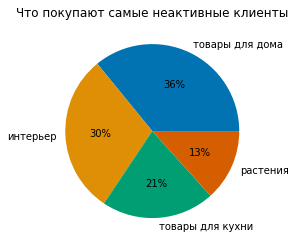

In [83]:
df4 = group_4_category['quantity_x']
labels4 = group_4_category['category']

colors = sns.color_palette('colorblind')[ 0:4 ]
#create pie chart
plt.pie(df4, labels = labels4, colors = colors, autopct='%.0f%%')
plt.title('Что покупают самые неактивные клиенты')
plt.show()

___Самые неактивные пользователи больше всего покупают товаров для дома(35%) и товаров для интерьера(30%). Меньше-товаров для кухни(21%) и растений(13%)___

In [84]:
group_4['date']=group_4.date.astype('datetime64[M]')
group4_month=group_4.pivot_table(index='date',values='quantity_x',columns='category',aggfunc='sum').reset_index(drop=False)
group4_month=group4_month.fillna(0)
group4_month

category,date,интерьер,растения,товары для дома,товары для кухни
0,2018-10-01,27.0,2.0,31.0,13.0
1,2018-11-01,7.0,2.0,17.0,8.0
2,2018-12-01,24.0,22.0,19.0,20.0
3,2019-01-01,0.0,0.0,3.0,0.0


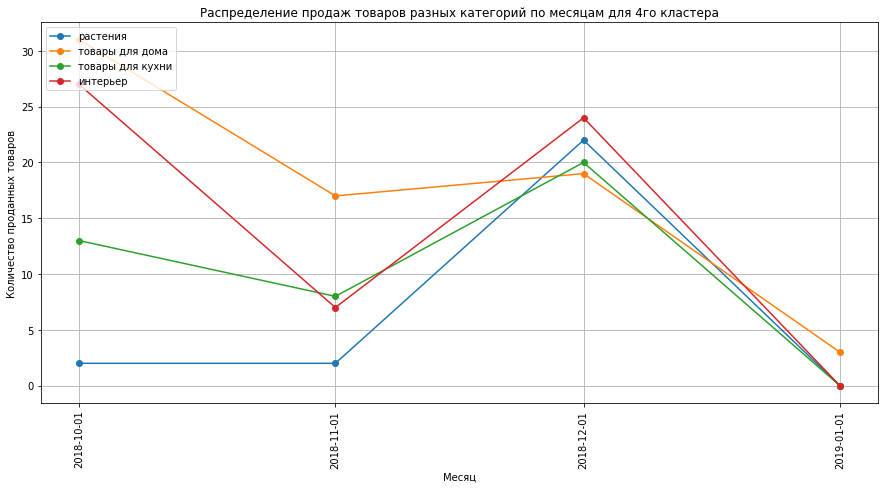

In [85]:
fig, ax = plt.subplots(figsize=(15, 7))
my_list=['растения','товары для дома','товары для кухни','интерьер']
for i in list(my_list):
    ax.plot(group4_month.date, group4_month.loc[:, i], marker ='o', label=i)

plt.xticks(group4_month.date)
plt.xticks(rotation=90)
plt.xlabel('Месяц')
plt.ylabel('Количество проданных товаров')
plt.grid()
plt.legend(loc='upper left')
plt.title('Распределение продаж товаров разных категорий по месяцам для 4го кластера')
plt.show()

___Товары для кухни , интерьер и товары для дома лучше покупались в октябре и декабре 2018 года,растения-в декабре 2018___

In [86]:
print(f"Медианное значение чека четвертого кластера:{group_4['summary_y'].median()}")

Медианное значение чека четвертого кластера:179.5


In [87]:
last_customers=group_4.groupby('customer_id')['category'].unique().reset_index(drop=False)
last_customers.head()

,customer_id,category
0,0673033d-8bb9-4d9f-afc9-21f0276a5940,[растения]
1,0946f283-946c-4fc9-b7b0-9c9f73f87acd,[растения]
2,0e26f0b8-0801-4578-8337-40f12a764255,[интерьер]
3,0e6ed482-a9d9-4c94-a4ff-382502a08d98,[товары для дома]
4,0ed0e208-f3d2-4df1-b678-2c7a04944f4c,[растения]


## Шаг4 Проверка статистических гипотез 

### Статистическая гипотеза: нет статистической значимости между средним чеком 2х кластеров  H0- нет статистической значимости между средними чеками двух кластеров  H1- есть стат. значимая разница между средними чеками двух кластеров

_Сравним средние чеки всех кластеров между собой непараметрическим тестом Манна-Уитни( был выбран этот тест , т.к в данных могут оставаться выбросы и мы не можем утверждать о нормалности распределения исследуемых метрик ), так же применим поправку Бонферрони для множественных тестов_ 

In [88]:
alpha = 0.05/6 # поправка Бонферрони для множественных сравнений

results12 = st.mannwhitneyu(group_1['summary_y'],group_2['summary_y']) #сравниваем чеки 1го и 2го кластера
results13 = st.mannwhitneyu(group_1['summary_y'],group_3['summary_y']) # 1го и 3го кластера итд
results14 = st.mannwhitneyu(group_1['summary_y'],group_4['summary_y'])
results23 = st.mannwhitneyu(group_2['summary_y'],group_3['summary_y'])
results24 = st.mannwhitneyu(group_2['summary_y'],group_4['summary_y'])
results34 = st.mannwhitneyu(group_3['summary_y'],group_4['summary_y'])



print('p-значение12: ', results12.pvalue)
if results12.pvalue < alpha:
    print('Отвергаем нулевую гипотезу,есть стат. значимая разницы между чеками')
else:
    print('Не получилось отвергнуть нулевую гипотезу,нет стат. значимой разницы между чеками')
    
print('p-значение13: ', results13.pvalue)
if results13.pvalue < alpha:
    print('Отвергаем нулевую гипотезу,есть стат. значимая разница между чеками')
else:
    print('Не получилось отвергнуть нулевую гипотезу,нет стат. значимой разницы между чеками')
    
print('p-значение14: ', results14.pvalue)
if results14.pvalue < alpha:
    print('Отвергаем нулевую гипотезу,есть стат. значимая разница между чеками')
else:
    print('Не получилось отвергнуть нулевую гипотезу,нет стат. значимой разницы между чеками')
    

print('p-значение23: ', results23.pvalue)
if results23.pvalue < alpha:
    print('Отвергаем нулевую гипотезу,есть стат. значимая разница между чеками')
else:
    print('Не получилось отвергнуть нулевую гипотезу,нет стат. значимой разницы между чеками')
    
print('p-значение24: ', results24.pvalue)
if results24.pvalue < alpha:
    print('Отвергаем нулевую гипотезу,есть стат. значимая разница между чеками')
else:
    print('Не получилось отвергнуть нулевую гипотезу,нет стат. значимой разницы между чеками')
    

print('p-значение34: ', results34.pvalue)
if results34.pvalue < alpha:
    print('Отвергаем нулевую гипотезу,есть стат. значимая разница между чеками')
else:
    print('Не получилось отвергнуть нулевую гипотезу,нет стат. значимой разницы между чеками')
    







p-значение12:  0.005288800530491206
Отвергаем нулевую гипотезу,есть стат. значимая разницы между чеками
p-значение13:  0.04854827179873551
Не получилось отвергнуть нулевую гипотезу,нет стат. значимой разницы между чеками
p-значение14:  1.820232778660473e-27
Отвергаем нулевую гипотезу,есть стат. значимая разница между чеками
p-значение23:  0.03375723071733804
Не получилось отвергнуть нулевую гипотезу,нет стат. значимой разницы между чеками
p-значение24:  5.361455240747564e-40
Отвергаем нулевую гипотезу,есть стат. значимая разница между чеками
p-значение34:  4.661829035073016e-46
Отвергаем нулевую гипотезу,есть стат. значимая разница между чеками


### Статистическая гипотеза: нет статистической значимости между кол-вом товаров в заказах 2х кластеров  H0- нет статистической значимости между кол-вом товаров  заказых двух кластеров  H1- есть стат. значимая разница между кол-вом товаров в заказах двух кластеров

_Сравним кол-во товаров в заказе во всех кластерах между собой с помощью теста Манна-Уитни_

In [89]:
alpha = 0.05/6 # поправка Бонферрони для множественных сравнений

results12 = st.mannwhitneyu(group_1['quantity_y'],group_2['quantity_y']) 
results13 = st.mannwhitneyu(group_1['quantity_y'],group_3['quantity_y']) 
results14 = st.mannwhitneyu(group_1['quantity_y'],group_4['quantity_y'])
results23 = st.mannwhitneyu(group_2['quantity_y'],group_3['quantity_y'])
results24 = st.mannwhitneyu(group_2['quantity_y'],group_4['quantity_y'])
results34 = st.mannwhitneyu(group_3['quantity_y'],group_4['quantity_y'])



print('p-значение12: ', results12.pvalue)
if results12.pvalue < alpha:
    print('Отвергаем нулевую гипотезу,есть стат. значимая разницы между кол-вом товаров в заказе')
else:
    print('Не получилось отвергнуть нулевую гипотезу,нет стат. значимой разницы между кол-вом товаров в заказе')
    
print('p-значение13: ', results13.pvalue)
if results13.pvalue < alpha:
    print('Отвергаем нулевую гипотезу,есть стат. значимая разница между кол-вом товаров в заказе')
else:
    print('Не получилось отвергнуть нулевую гипотезу,нет стат. значимой разницы между кол-вом товаров в заказе')
    
print('p-значение14: ', results14.pvalue)
if results14.pvalue < alpha:
    print('Отвергаем нулевую гипотезу,есть стат. значимая разница между кол-вом товаров в заказе')
else:
    print('Не получилось отвергнуть нулевую гипотезу,нет стат. значимой разницы между кол-вом товаров в заказе')
    
print('p-значение23: ', results23.pvalue)
if results23.pvalue < alpha:
    print('Отвергаем нулевую гипотезу,есть стат. значимая разница между кол-вом товаров в заказе')
else:
    print('Не получилось отвергнуть нулевую гипотезу,нет стат. значимой разницы между кол-вом товаров в заказе')
    
print('p-значение24: ', results24.pvalue)
if results24.pvalue < alpha:
    print('Отвергаем нулевую гипотезу,есть стат. значимая разница между кол-вом товаров в заказе')
else:
    print('Не получилось отвергнуть нулевую гипотезу,нет стат. значимой разницы между кол-вом товаров в заказе')
    

print('p-значение34: ', results34.pvalue)
if results34.pvalue < alpha:
    print('Отвергаем нулевую гипотезу,есть стат. значимая разница между кол-вом товаров в заказе')
else:
    print('Не получилось отвергнуть нулевую гипотезу,нет стат. значимой разницы между кол-вом товаров в заказе')
    

    

p-значение12:  1.176283481066236e-05
Отвергаем нулевую гипотезу,есть стат. значимая разницы между кол-вом товаров в заказе
p-значение13:  0.00263367331172253
Отвергаем нулевую гипотезу,есть стат. значимая разница между кол-вом товаров в заказе
p-значение14:  0.015648542574733214
Не получилось отвергнуть нулевую гипотезу,нет стат. значимой разницы между кол-вом товаров в заказе
p-значение23:  4.963888915875259e-06
Отвергаем нулевую гипотезу,есть стат. значимая разница между кол-вом товаров в заказе
p-значение24:  6.878562545636241e-17
Отвергаем нулевую гипотезу,есть стат. значимая разница между кол-вом товаров в заказе
p-значение34:  2.674035697214947e-12
Отвергаем нулевую гипотезу,есть стат. значимая разница между кол-вом товаров в заказе


## Шаг5. Общий вывод по проделанной работе


__В исследуемом датасете представлены данные о покупках в интернет-магазине товаров для дома "Пока все еще тут" за период с 01.10.2018 до 31.10.2019 года. Всего в датасете представлено 2426 покупателей и 2336 уникальных наименований товара__  
__Больше всего покупок приходится на апрель и май 2019 года , меньше всего на январь,август,сентябрь и октябрь 2019 года__  
__90% покупателей имеют всего один заказ__  
__1443 клиента последние 6 месяцев не совершали покупки__  
__В ходе разбивки товаров на категории ,были выделены следующие категории : товары для дома, растения,товары для кухни,интерьер и сумки__  
__Больше всего покупают товары категории товары для дома, растения и интерьер (35%,30% и 23%), меньше всего товары для кухни и сумки (10% и 2%)__  
__Так выглядят топ-20 самых продаваемых товаров:__
__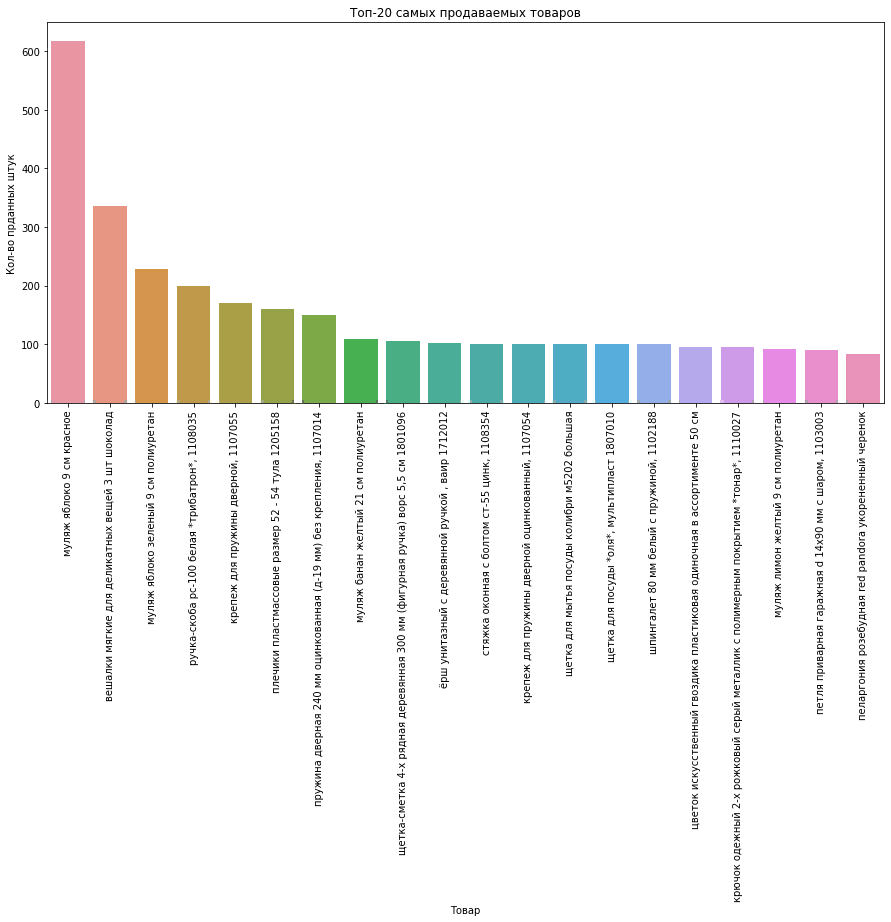__  
__В ходе разбивки покупателей на кластеры методом RFM-анализа, были выделены 4 группы покупателей :___  

__group_1-лучшие покупатели (все их показатели-давность последней покупки,частота и выручка имеют максимальные значения).Больше всего лучшие клиенты заказывают растения-62% и товары для дома -20%.Меньше всего-товары для кухни (3%).Сумки и товары для интерьера-тоже немного(7% и 8%).По сезонности:растения лучше всего продавались в мае и сентябре 2019 года,товары для дома-в августе и октябре 2019,сумки-в августе 2019,товары для интерьера -в июле,августе и сентябре 2019 ,товары для кухни-в октябре 2019.Средний чек этого кластера-1060.Первый кластер клиентов хорошо покупает растения -возможно стоит провести сезонную акцию по этой категории товаров. Или простимулировать на покупку менее продаваемых категорий скидками,например___  

__group_2-лояльные покупатели(частота их покупок относитеьно высокая и давность покупки не высокая).Кластер лояльных клиентов так же больше всего покупает растения(45%), а так же товары для дома(23%),товары для кухни(15%) и для интерьера(15%). Меньше всего покупают сумок(2%).По сезонности:растения лучше всего продавались в апреле и мае 2019 года,товары для дома-в октябре 2018, апреле и октябре 2019года, товары для интерьера-в феврале 2018 года и июле 2019 ,товары для кухни -в апреле 2019.Средний чека этого кластера-864.Рекомендации те же , что и для 1го кластера покупателей.Так же можно предложить ввести накопительную скидочную карту или бонусную карту для этого кластера пользователей-поддержать их лояльность__  

__group_3-покупатели на пороге оттока(давность последней покупки -высокая).Кластер клиентов на пороге оттока больше всего покупают товары для дома(41%) и интерьера(24%). Растения(18%) и товары для кухни(13%) -чуть меньше. Сумки-меньше всего(3%).По сезонности: растения лучше всего покупались в марте 2019 года, товары для дома -в октябре,декабре и марте 2018 года,. Товары для кухни-в ноябое 2018 года и феврале 2019, интерьер-ноябре 2018 года и и феврале 2019, сумки -в декабре 2018 года.Средни чек этого кластера-899.Можно предположить, что клиенты не очень довольны товарами для дома и интерьера ,раз после этого не совершают повторные покупки.Или ,возможно, что товары для дома не предполагают слишком частого обновления.Можно порекомендовать уточнить у покупателей , почему они так давно ничего заказывали___  

__group_4-самые неактивные (все показатели на минимальном значении).Самые неактивные пользователи больше всего покупают товаров для дома(35%) и товаров для интерьера(30%). Меньше-товаров для кухни(21%) и растений(13%).По сезонности:товары для кухни , интерьер и товары для дома лучше покупались в октябре и декабре 2018 года,растения-в декабре 2018.Средний чек этого кластера 179,5. Рекомендации те же, что и для 3го кластера___  

__Так же были выделенены покупатели, совершившие покупку на сумму от 5000 и более-можно предложить таким покупателям давать мини-подарки и самый активный покупатель ,сделавший за весь период 126 заказов-ему можно предложить золотую карту покупателя с превилегиями__  

__Были проверены две гипотезы с помощью непараметрического теста Манна-Уитни -первая : средние чеки выявленных кластеров равны между собой. Результат: нет статистически значимой разницы между чеками 1го и 3го кластера и между чеками 2го и 3го кластера. Между другими кластерами есть стат. значимая разица__  
__И вторая гипотеза : кол-во товаров в заказе равно между кластерами.Результат: нет стат. значимой разницы между кол-вом товара в заказе между 1 и 4ым кластером. Между другими кластерами-есть стат. значимая разница__   

